<a href="https://colab.research.google.com/github/ashishsalunkhe/Detecting-Anomalies-and-Influence-of-External-Factors-over-Time-Series-Data/blob/main/ExternalFactorsTimeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pytrends yfinance

     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 6.4 MB 29.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pytrends import dailydata
import yfinance as fin
from datetime import datetime

In [ ]:
# selecting ticker for yahoo finance
ticker = 'INTC' # which stock to search for
ticker_handle = fin.Ticker(ticker) # ticker handler
company_name = ticker_handle.info.get('shortName')

# getting 30 days of trend and finance data
t_now = datetime.now()
t_prev= datetime.fromtimestamp(t_now.timestamp()-(3600*24*30))
trends = dailydata.get_daily_data(company_name,t_prev.year,t_prev.month,
                                  t_now.year,t_now.month)
fin_data = fin.download(ticker,start=t_prev.strftime('%Y-%m-%d'),
                        end=t_now.strftime('%Y-%m-%d'))

print('Most Recent Stock Price for  on : $'.format(\
    company_name,fin_data.index[-1].strftime('%m-%d-%Y'),fin_data.values[-1,3]))
print('Most Recent Google Trend Data for  on : '.format(company_name,
                                                       trends.index[-1].strftime('%m-%d-%Y'),
                                                                      trends.values[-1,3]))

Intel Corporation:2021-12-01 2021-12-31
Intel Corporation:2022-01-01 2022-01-31
[*********************100%***********************]  1 of 1 completed
Most Recent Stock Price for  on : $
Most Recent Google Trend Data for  on : 


Meta:2020-01-01 2020-01-31
Meta:2020-02-01 2020-02-29
Meta:2020-03-01 2020-03-31
Meta:2020-04-01 2020-04-30
Meta:2020-05-01 2020-05-31
Meta:2020-06-01 2020-06-30
Meta:2020-07-01 2020-07-31
Meta:2020-08-01 2020-08-31
Meta:2020-09-01 2020-09-30
Meta:2020-10-01 2020-10-31
Meta:2020-11-01 2020-11-30
Meta:2020-12-01 2020-12-31
[*********************100%***********************]  1 of 1 completed


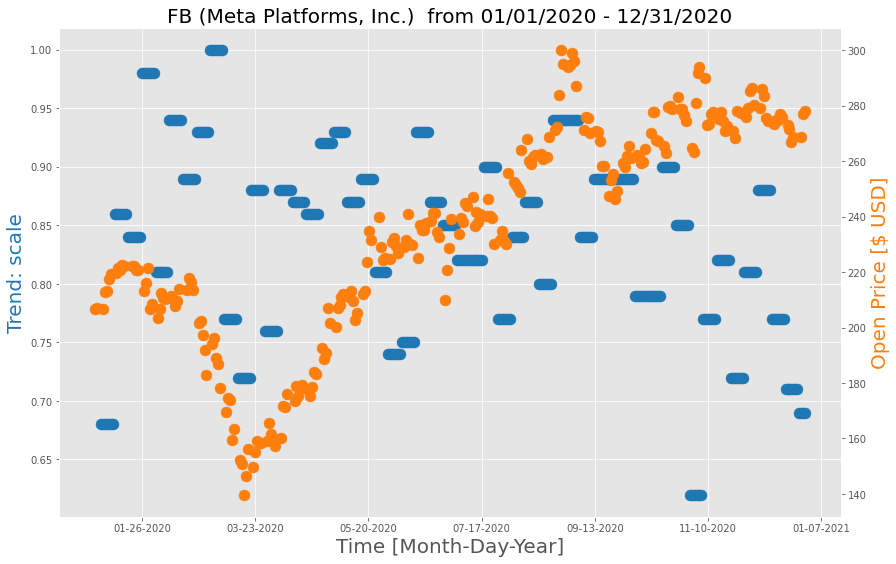

In [ ]:
from pytrends import dailydata
import numpy as np
import matplotlib.pyplot as plt
import yfinance as fin
import datetime

#
######################################
# INPUTS
######################################
#
ticker = 'FB' # which stock to search for
date_range = [1,1,2020,12,31,2020] # date range of interest, format: 'month,day,year'
fin_indx = 0 #Prices: 0=Open,1=High,2=Low,3=Close,4=Adj Close,5=Volume
trend_indx = 3 #Popularity: 0=unscaled 0-100, 1=monthly, 2=isPartial, 3=scaled 

#
######################################
# DATE AND DATA HANDLING
######################################
#
start_t = datetime.datetime(date_range[2],date_range[0],date_range[1])
end_t   = datetime.datetime(date_range[5],date_range[3],date_range[4])

ticker_handle = fin.Ticker(ticker)
trends = dailydata.get_daily_data(ticker_handle.info.get('shortName').split(' ')[0],
                                  date_range[2],date_range[0],
                                  date_range[5],date_range[3])

fin_data = fin.download(ticker,start=start_t.strftime('%Y-%m-%d'),
                        end=end_t.strftime('%Y-%m-%d'))

#
######################################
# PLOTTING ROUTINES
######################################
#
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(14,9))

fin_keys = fin_data.keys() # keys for naming plotted finance data
trend_keys = trends.keys() # keys for naming plotted trends data

fin_x   = [ii.timestamp() for ii in fin_data.index] # formatting dates into timestamp for plotting
fin_y   = (fin_data.values)[:,fin_indx] # trend data to plot

trend_x = [ii.timestamp() for ii in trends.index] # formatting dates into timestamp for plotting
trend_y = (trends.values)[:,trend_indx] # trend data to plot

trend_start_indx = np.argmin(np.abs(np.subtract(trend_x,fin_x[0])))
trend_end_indx   = np.argmin(np.abs(np.subtract(trend_x,fin_x[-1])))
trend_x = trend_x[trend_start_indx:trend_end_indx+1] # align trends + stock $
trend_y = trend_y[trend_start_indx:trend_end_indx+1] # align trends + stock $

scat1 = ax.scatter(trend_x,trend_y,color=plt.cm.tab20(0),s=120) # scatter trend data

ax.set_ylabel('Trend: '+(trend_keys[trend_indx].replace('_',' ')),
              fontsize=20,color=plt.cm.tab20(0))
x_ticks = ax.get_xticks()
x_str_labels = [(datetime.datetime.fromtimestamp(ii)).strftime('%m-%d-%Y') for ii in x_ticks]
ax.set_xticklabels(x_str_labels) # format dates on x-axis
ax.set_xlabel('Time [Month-Day-Year]',fontsize=20)

ax2 = ax.twinx() # twin axis to plot both data on the same plot
ax2.grid(False) # this prevents the axes from being too messy
scat2 = ax2.scatter(fin_x,fin_y,color=plt.cm.tab20(2),s=120) # scatter finance data
ax2.set_ylabel(fin_keys[fin_indx]+' Price [$ USD]',fontsize=20,color=plt.cm.tab20(2))

plt.title(ticker+' ({}) '.format(ticker_handle.info.get('shortName'))+' from {} - {}'.format(start_t.strftime('%m/%d/%Y'),
                                        end_t.strftime('%m/%d/%Y')),
          fontsize=20)

plt.show() # show plot

Meta:2020-01-01 2020-01-31
Meta:2020-02-01 2020-02-29
Meta:2020-03-01 2020-03-31
Meta:2020-04-01 2020-04-30
Meta:2020-05-01 2020-05-31
Meta:2020-06-01 2020-06-30
Meta:2020-07-01 2020-07-31
Meta:2020-08-01 2020-08-31
Meta:2020-09-01 2020-09-30
Meta:2020-10-01 2020-10-31
Meta:2020-11-01 2020-11-30
Meta:2020-12-01 2020-12-31
Meta:2021-01-01 2021-01-31
Meta:2021-02-01 2021-02-28
Meta:2021-03-01 2021-03-31
Meta:2021-04-01 2021-04-30
Meta:2021-05-01 2021-05-31
Meta:2021-06-01 2021-06-30
Meta:2021-07-01 2021-07-31
Meta:2021-08-01 2021-08-31
Meta:2021-09-01 2021-09-30
Meta:2021-10-01 2021-10-31
Meta:2021-11-01 2021-11-30
Meta:2021-12-01 2021-12-31
Meta:2022-01-01 2022-01-31
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars


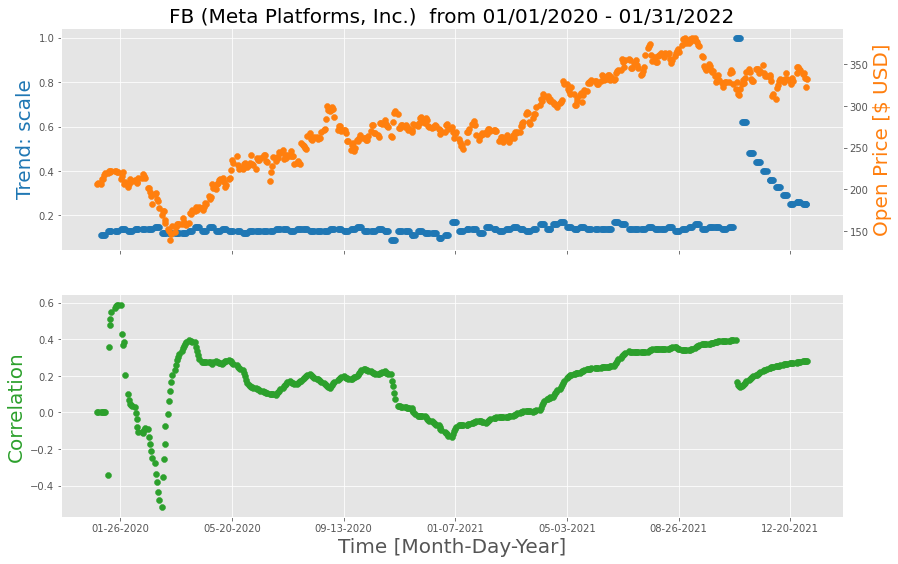

In [ ]:
from pytrends import dailydata
import numpy as np
import matplotlib.pyplot as plt
import yfinance as fin
import datetime

#
######################################
# INPUTS
######################################
#
ticker = 'FB' # which stock to search for
date_range = [1,1,2020,1,31,2022] # date range of interest, format: 'month,day,year'
fin_indx = 0 #Prices: 0=Open,1=High,2=Low,3=Close,4=Adj Close,5=Volume
trend_indx = 3 #Popularity: 0=unscaled 0-100, 1=monthly, 2=isPartial, 3=scaled 

#
######################################
# DATE AND DATA HANDLING
######################################
#
start_t = datetime.datetime(date_range[2],date_range[0],date_range[1])
end_t   = datetime.datetime(date_range[5],date_range[3],date_range[4])

ticker_handle = fin.Ticker(ticker)
trends = dailydata.get_daily_data(ticker_handle.info.get('shortName').split(' ')[0],
                                  date_range[2],date_range[0],
                                  date_range[5],date_range[3])

fin_data = fin.download(ticker,start=start_t.strftime('%Y-%m-%d'),
                        end=end_t.strftime('%Y-%m-%d'))

#
######################################
# Time aligning routines
######################################
#
fin_keys = fin_data.keys() # keys for naming plotted finance data
trend_keys = trends.keys() # keys for naming plotted trends data

fin_x   = [ii.timestamp() for ii in fin_data.index] # formatting dates into timestamp for plotting
fin_y   = (fin_data.values)[:,fin_indx] # trend data to plot

trend_x = [ii.timestamp() for ii in trends.index] # formatting dates into timestamp for plotting
trend_y = (trends.values)[:,trend_indx] # trend data to plot

trend_start_indx = np.argmin(np.abs(np.subtract(trend_x,fin_x[0])))
trend_end_indx   = np.argmin(np.abs(np.subtract(trend_x,fin_x[-1])))
trend_y = [trend_y[np.argmin(np.abs(np.subtract(ii,trend_x)))] for ii in fin_x] # align trends + stock $
trend_x = [trend_x[np.argmin(np.abs(np.subtract(ii,trend_x)))] for ii in fin_x] # align trends + stock $
#
#######################################
# correlation calculation
#######################################
#
corr_xy_array = [0.0]
for ii in range(1,len(fin_y)):
    mean_x = np.nanmean(trend_y[0:ii])
    mean_y = np.nanmean(fin_y[0:ii])
    sigma_x = np.sqrt(np.nansum(np.power(trend_y[0:ii]-mean_x,2.0)))
    sigma_y = np.sqrt(np.nansum(np.power(fin_y[0:ii]-mean_y,2.0)))
    corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii],mean_x)),
                                     np.subtract(fin_y[0:ii],mean_y))))\
              /(sigma_x*sigma_y)
    if np.isnan(corr_xy):
        corr_xy = 0.0
    corr_xy_array.append(corr_xy)

#
#######################################
# PLOTTING
#######################################
#
plt.style.use('ggplot')
fig,axs = plt.subplots(2,1,figsize=(14,9),sharex=True)

ax = axs[0]
ax.scatter(trend_x,trend_y,color=plt.cm.tab20(0))
ax2 = ax.twinx()
ax2.grid(False)
ax2.scatter(fin_x,fin_y,color=plt.cm.tab20(2))

ax.set_ylabel('Trend: '+(trend_keys[trend_indx].replace('_',' ')),color=plt.cm.tab20(0),fontsize=20)
ax2.set_ylabel(fin_keys[fin_indx]+' Price [$ USD]',color=plt.cm.tab20(2),fontsize=20)

ax3 = axs[1]
scat3 = ax3.scatter(fin_x,corr_xy_array,color=plt.cm.tab20(4)) # scatter trend data
ax3.set_ylabel('Correlation',
              fontsize=20,color=plt.cm.tab20(4))
x_ticks = ax3.get_xticks()
x_str_labels = [(datetime.datetime.fromtimestamp(ii)).strftime('%m-%d-%Y') for ii in x_ticks]
ax3.set_xticklabels(x_str_labels) # format dates on x-axis
ax3.set_xlabel('Time [Month-Day-Year]',fontsize=20)
ax2.set_xticklabels(x_str_labels)

ax.set_title(ticker+' ({}) '.format(ticker_handle.info.get('shortName'))+' from {} - {}'.format(start_t.strftime('%m/%d/%Y'),
                                        end_t.strftime('%m/%d/%Y')),
          fontsize=20)

plt.show() # show plot

In [ ]:
fin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000


In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

In [ ]:
# fin_data.drop(columns=['Adj Close'], inplace = True)

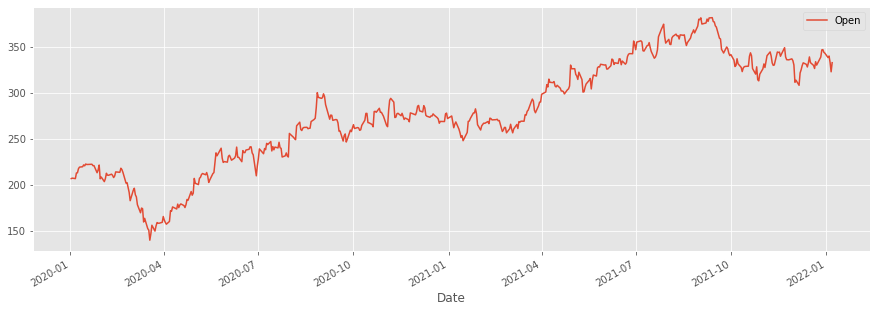

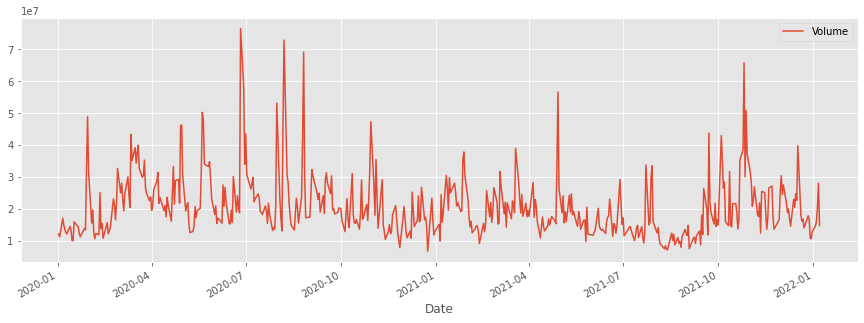

In [ ]:
fin_data.plot(y=['Open'])
fin_data.plot(y=['Volume'])


Based on above plots:
1.   Open - This time series follows a good trend
2.   Volume -  Doesn't follow a pattern. Inconsistent.



In [ ]:
fin_data.to_csv("persistent-share-price.csv")